### Анализ данных Яндекс.Афиша <a name="step5"></a>

#### Задача:
По данным Яндекс.Афишы за период с июня 2017 по конец мая 2018 года изучить как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит каждый клиент и когда окупаются расходы на привлечение клиента. Помочь маркетологам снизить расходы - отказаться от невыгодных источников траффика и перераспределить бюджет.

#### План:
1. [Открытие файлов с данными и изучение общей информации.](#step1)
2. [Предобработка данных.](#step2)
3. [Расчёт метрик и постройка графиков:](#step3)
    1. [Продуктовые метрики;](#stepA)
    2. [Метрики электронной коммерции;](#stepB)
    3. [Маркетинговые метрики.](#stepC)
4. [Выводы.](#step4)

### 1. Открытие файлов с данными и изучение общей информации. <a name="step1"></a>

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('visits_log.csv') #данные о посещении сайта
orders = pd.read_csv('orders_log.csv') #выгрузка заказов за период с июня 2017 по конец мая 2018
costs = pd.read_csv('costs.csv') #статистика рекламных расходов

In [3]:
visits.info() #изучим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


В этом датафрейме необходимо привести названия столбцов к нижнему регистру и столбцы с данными о начале и окончании визита к типу datetime и убрать пробел из названия столбцов.

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Здесь необходимо привести названия столбцов к нижнему регистру и столбец с данными о покупке к типу datetime  и убрать пробел из названия столбца.

In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Здесь необходимо преобразовать столбец dt в формат datetime.

[В начало](#step5)

### 2. Предобработка данных. <a name="step2"></a>

In [9]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [10]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


[В начало](#step5)

### 3. Рассчёт метрик и постройка графиков. <a name="step3"></a>

#### А. Продуктовые метрики <a name="stepA"></a>

Рассчитаем количество уникальных посетителей заходит в день, неделю и месяц. Для этого необходимо добавить новые столбцы со значениями года, месяца, недели и дня в датафрейм с визитами.

In [12]:
visits['year_ts'] = visits['start_ts'].dt.year
visits['month_ts'] = visits['start_ts'].dt.month
visits['week_ts'] = visits['start_ts'].dt.week
visits['date_ts'] = visits['start_ts'].dt.date

In [13]:
dau = visits.groupby('date_ts').agg({'uid':'nunique'})
dau.mean().astype('int')

uid    907
dtype: int32

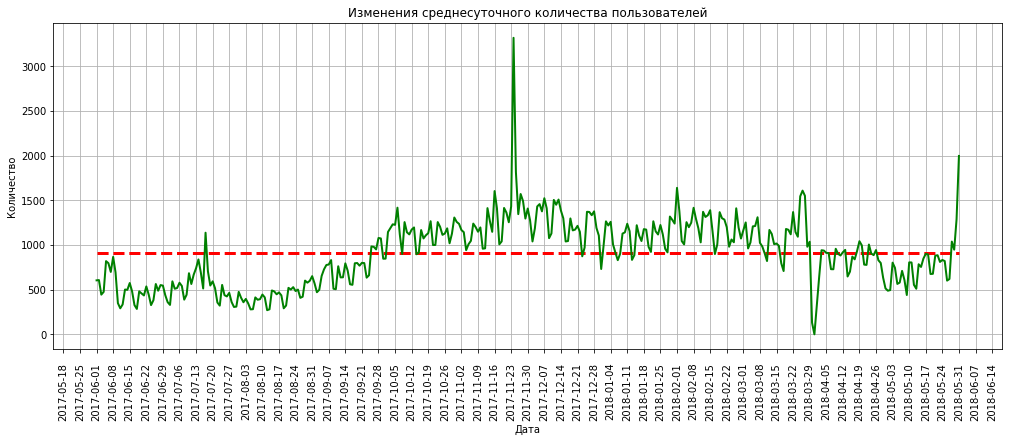

In [14]:
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(dau.index, dau['uid'], c='green', lw=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis='x',
               pad = 10,
               labelrotation=90)
ax.hlines(dau.mean().astype('int'), dau.index[0], dau.index[363],
         color='r',
         linewidth=3,
         linestyle='--')
ax.grid()
ax.set_title('Изменения среднесуточного количества пользователей')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')
plt.show()

С начала ведения нашей статистики, с 1 июня 2017 до 1 октября 2017 года наблюдается неравномерный рост среднесуточной посещаемости с резким скачком 16 июля. Однако, в целом, среднесуточные показатели низкие на протяжении почти всего лета. Скорее всего, это связано с тем, что многие артисты берут отпуск на летние месяцы и не дают концерты. Скачок в июле связан, возможно, с каким-либо большим фестивалем. Далее, на протяжении периода до конца марта 2018 примерно на одном уровне показатели среднесуточной посещаемости, с периодическами всплесками активности. Однако, аномальные показатели 24 ноября 2017 года. Резкий скачок посещаемости, превышающий в 3 раза среднесуточную. Возможно, связан с маркетиноговой активностью, либо с каким-то мероприятием. Также выпадает период с 30 марта по 2 апреля 2018. Там, вообще, отсутствуют посещения. Либо у нас пропали данные за этот период, либо были проблемы с сайтом.
В среднем, 907 уникальных пользователей посещают ресурс в день.

In [15]:
wau = visits.groupby(['year_ts', 'week_ts']).agg({'uid':'nunique'})
wau.mean().astype('int')

uid    5716
dtype: int32

In [16]:
wau = wau.reset_index()

In [17]:
ticks_wau = [18, 19, 20, 21] + wau['week_ts'].to_list()

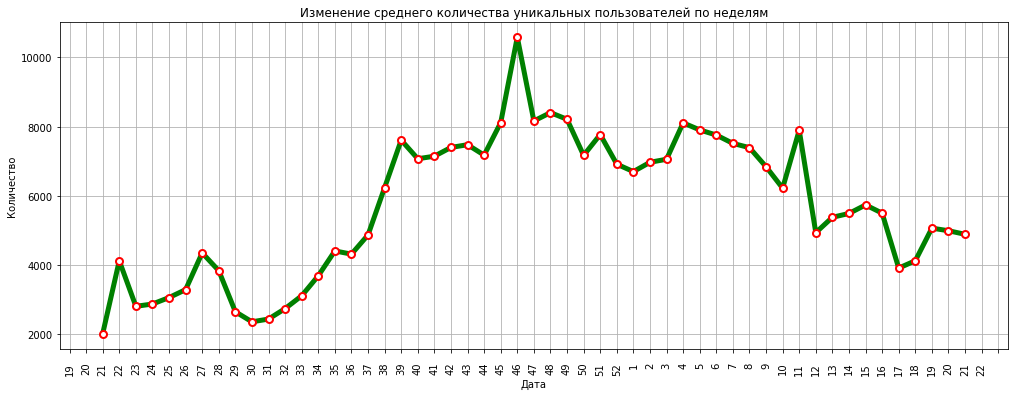

In [18]:
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(wau.index, wau['uid'], c='green', lw=5, marker = 'o', mec='red', mew=2, mfc='white', ms=7)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels(labels=ticks_wau)
ax.tick_params(axis='x',
               pad = 10,
               labelrotation=90)
ax.grid()
ax.set_title('Изменение среднего количества уникальных пользователей по неделям')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')
plt.show()

Летние недели показывают невысокие показатели посещаемости, за исключением 28 и 23 недель. Далее с 33 недели, то есть, со второй половины августа, идёт плавный рост посещаемости. 47 неделя выделяется, так как на той неделе были аномальные показатели от 24 ноября.
В среднем, 5716 уникальных пользователей посещают ресурс в неделю.

In [19]:
mau = visits.groupby(['year_ts', 'month_ts']).agg({'uid':'nunique'})
mau.mean().astype('int')

uid    23228
dtype: int32

In [20]:
mau = mau.reset_index()

In [21]:
ticks_mau = [5] + mau['month_ts'].to_list()

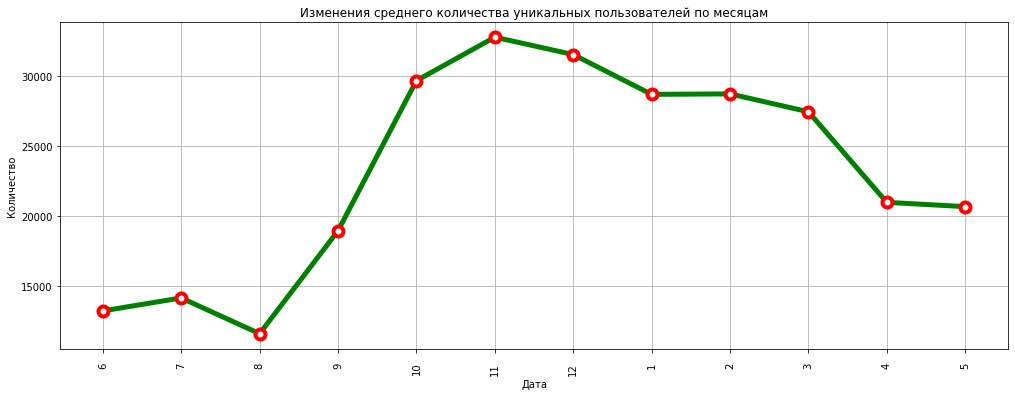

In [22]:
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(mau.index, mau['uid'], c='green', lw=5, marker = 'o', mec='red', mew=4, mfc='white', ms=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels(labels=ticks_mau)
ax.tick_params(axis='x',
               pad = 10,
               labelrotation=90)
ax.grid()
ax.set_title('Изменения среднего количества уникальных пользователей по месяцам')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')
plt.show()

Более общую картину видим по месяцам: летние месяцы проседают по посещениям, а с сентября идёт рост. Также с низкими показателями посещений может быть связано то, что летние месяцы - это месяцы отпусков не только у артистов, но и у посетителей. А в сентябре уже большинство возвращается обратно и начинают посещать ресурсы с поиском развлечений.
В среднем, 23228 уникальных пользователей посещает ресурс в месяц.

In [23]:
session_per_user = visits.groupby('date_ts').agg({'uid':['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['sessions_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
session_per_user['sessions_per_user'].mean()

1.0821696440039723

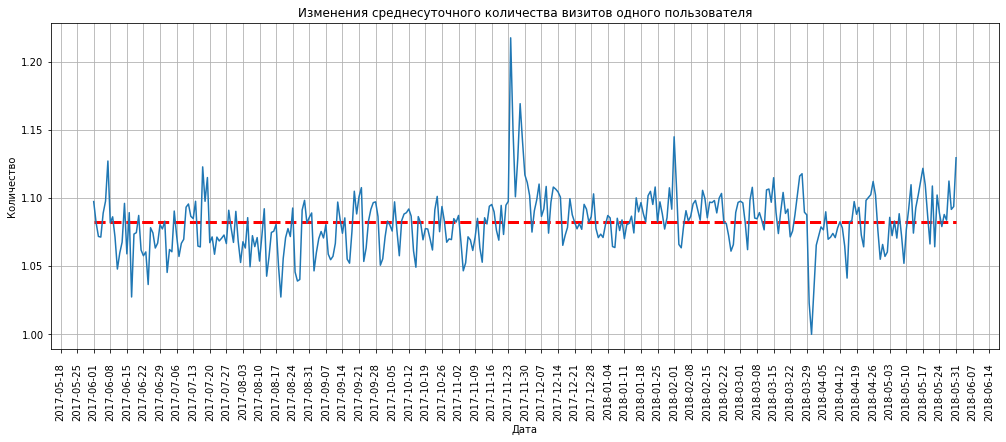

In [24]:
fig, ax = plt.subplots(figsize=(17,6))
ax.plot(session_per_user.index, session_per_user['sessions_per_user'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis='x',
               pad = 10,
               labelrotation=90)
ax.grid()
ax.hlines(session_per_user['sessions_per_user'].mean(), session_per_user.index[0], session_per_user.index[363],
         color='r',
         linewidth=3,
         linestyle='--')
ax.set_title('Изменения среднесуточного количества визитов одного пользователя')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')
plt.show()

В среднем, один пользователь посещает ресурс 1,08 раз в день. Какого-то роста или падения среднего количества визитов одно пользователя в день не наблюдается. Есть какие-то локальные скачки на графике, но на общую картину это не влияет. Если сравнить с количеством дневных визитов, то, где какие-то аномальные значения на графике количества уникальных визитов, такие же скачки и на графике среднего количества визитов одного пользователя.

In [25]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   year_ts    359400 non-null  int64         
 6   month_ts   359400 non-null  int64         
 7   week_ts    359400 non-null  int64         
 8   date_ts    359400 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 24.7+ MB


<AxesSubplot:>

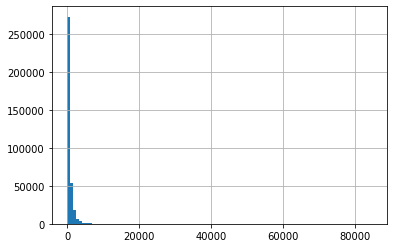

In [26]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds #добавляем столбец с длиной сессии
visits['session_duration_sec'].hist(bins=100) #строим гистограмму распределения сессий

Распределение длительности сессий не нормальное, поэтому типичную пользовательскую сессию расчитываем модой.

In [27]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

Чаще всего, пользователь проводит на ресурсе минуту.

In [28]:
first_session = visits.groupby(['uid'])['start_ts'].min() #находим дату первого визита пользователя
first_session.name = 'first_session'
visits = visits.merge(first_session, how='left', on='uid') #добавляем дату первого визита в датафрейм

In [29]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]') #добавляем столбец с месяцем визита
visits['first_session_month'] = visits['first_session'].astype('datetime64[M]') #добавляем столбец с месяцем первого визита

In [30]:
visits['lifetime'] = visits['session_month'] - visits['first_session_month'] #определяем, какой по счёту месяц со дня первого визита
visits['lifetime'] = visits['lifetime'] / np.timedelta64(1,'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [31]:
cohorts = visits.groupby(['first_session_month', 'lifetime']).agg({'uid':'nunique'}).reset_index() #сгруппируем по когортам

In [32]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_session_month', 'uid']] #найдём исходное количество пользователей в когорте
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [33]:
cohorts = cohorts.merge(initial_users_count, on='first_session_month') #добавим к когортам столбец с численностью когорты

In [34]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] #вычисляем retention rate

In [35]:
retention_pivot = cohorts.pivot_table(index='first_session_month', columns='lifetime', values='retention', aggfunc='sum')
#строим сводную таблицу retention rate

In [36]:
retention_pivot[1].mean() #вычислим среднее значение retention rate по второму месяцу

0.06516659710392834

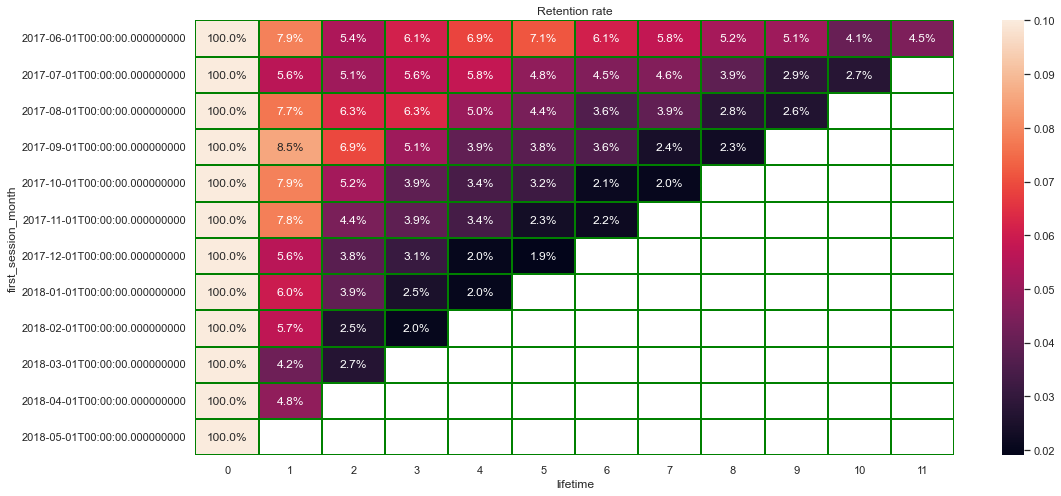

In [37]:
sns.set(style='white')
plt.figure(figsize=(17,8))
plt.title('Retention rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=2, linecolor='green', vmax=0.1)
plt.show()

Retention rate в основном снижается с течением времени существования когорты. Исключения июнь и июль. В июне с 3 по 6 месяц значение растёт, а потом снижается, а в июле с 3 по 5й месяца растёт, а потом снижается. Показатель второго месяца снижается, начиная с сентября. К апрелю 2018 года он уже почти в 2 раза ниже. Да и в целом, retention rate очень низкий. По второму месяцу среднее значение 6,5%. Получается, из 100 человек, в среднем, возвращаются только 6! Возможно, это связано с неудобством пользования ресурсом, либо плохой маркетинговой работой с действующими пользователями.

[В начало](#step5)

#### B. Метрики электронной коммерции <a name="stepB"></a>

In [38]:
first_visits = visits[visits['start_ts']==visits['first_session']][['start_ts', 'uid']] #сделаем датафрейм по первому посещению ресурса

In [39]:
first_orders = orders.groupby(['uid'])['buy_ts'].min().reset_index() #найдём первые покупки пользователей

In [40]:
fv_fb = first_visits.merge(first_orders, on='uid', how='inner') #приклеим к первому посещению ресурса данные с покупкой

In [41]:
fv_fb['time_to_buy'] = (fv_fb['buy_ts'] - fv_fb['start_ts']).dt.days #добавляем столбец с количеством дней, прошедших с момента захода на сайт до покупки

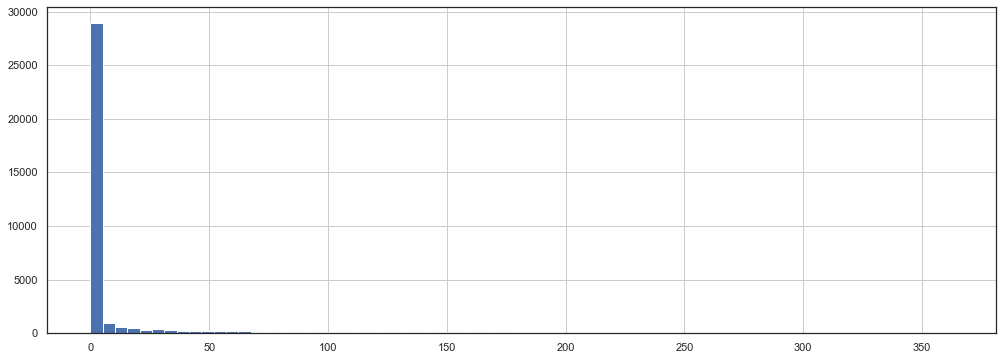

In [42]:
plt.figure(figsize=(17,6))
fv_fb['time_to_buy'].hist(bins=70)
plt.show()

Если пользователь совершает покупку, то чаще всего пользователь покупает в тот же день, что и первый раз заходит на сайт.

In [43]:
orders = orders.merge(first_orders, on='uid', how='left') #добавляем в датафрейм с заказами столбец с информацией о первом заказе 

In [44]:
orders.columns = ['buy_ts', 'revenue', 'uid', 'first_buy_ts']

In [45]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]') #добавляем столбец с месяцем заказа
orders['first_order_month'] = orders['first_buy_ts'].astype('datetime64[M]') #добавляем столбец с месяцем первого заказа

In [46]:
orders['lifetime'] = orders['order_month'] - orders['first_order_month'] #находим месяц заказа относительно первого заказа
orders['lifetime'] = orders['lifetime'] / np.timedelta64(1,'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')

In [47]:
cohorts_orders = orders.groupby(['first_order_month', 'lifetime']).agg({'buy_ts':'count'}).reset_index() #сгруппируем по когортам клиентов, найдём количество покупок

In [48]:
cohorts_orders_amount = orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index() #определяем величину когорт

In [49]:
cohorts_orders_halfyear = cohorts_orders[(cohorts_orders['first_order_month'] < '2018-01') & (cohorts_orders['lifetime'] < 6)] #сделаем срез по когортам, возраст которых 6 и более месяцев и возьмём период за 6 месяцев

In [50]:
orders_per_user = cohorts_orders_halfyear.groupby('first_order_month').agg({'buy_ts':'sum'}).reset_index() #находим количество заказов за 6 месяцев по каждой из когорт
orders_per_user = orders_per_user.merge(cohorts_orders_amount, on='first_order_month', how='left') #добавляем информацию о численности когорт

In [51]:
round(orders_per_user['buy_ts'].sum() / orders_per_user['uid'].sum(), 2) #находим среднее количество заказов на покупателя

1.41

В среднем приходится по 1,41 покупки на одного клиента за полгода. Очень низкий показатель: получается, что меньше половины купивших, возвращаются снова за покупкой в течение полугода.

In [52]:
cohorts_orders = orders.groupby(['first_order_month', 'lifetime']).agg({'buy_ts':'count', 'revenue':'sum'}).reset_index() #сгруппируем по когортам клиентов

In [53]:
cohorts_orders['revenue_per_user'] = cohorts_orders['revenue'] / cohorts_orders['buy_ts'] #рассчитаем средний чек по месяцам

In [54]:
cohorts_orders_pivot = cohorts_orders.pivot_table(index='first_order_month', columns='lifetime', values='revenue_per_user', aggfunc='sum')

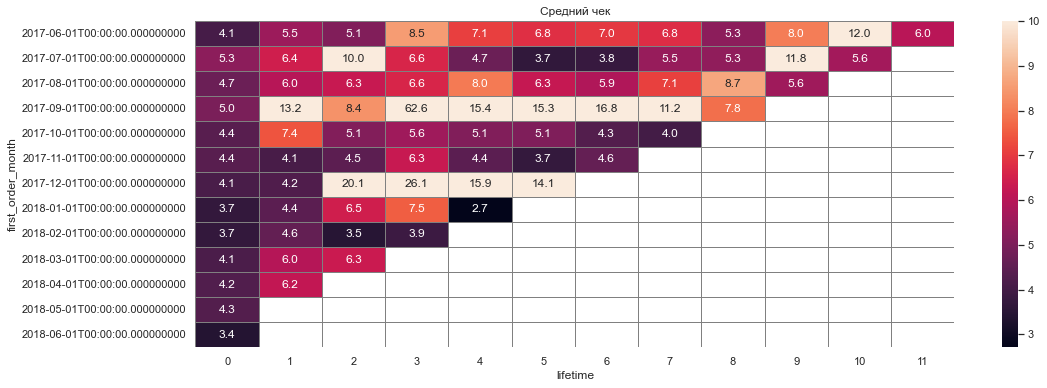

In [55]:
plt.figure(figsize=(17,6)) #строим тепловую карту по среднему чеку
plt.title('Средний чек')
sns.heatmap(cohorts_orders_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=10)
plt.show()

In [56]:
cohorts_orders[(cohorts_orders['first_order_month'] == '2017-09-01') | (cohorts_orders['first_order_month'] == '2017-12-01')]

,first_order_month,lifetime,buy_ts,revenue,revenue_per_user
33,2017-09-01,0,2933,14568.53,4.967109
34,2017-09-01,1,219,2884.49,13.171187
35,2017-09-01,2,161,1344.52,8.351056
36,2017-09-01,3,164,10261.52,62.570244
37,2017-09-01,4,67,1033.84,15.430448
38,2017-09-01,5,109,1670.08,15.321835
39,2017-09-01,6,108,1810.85,16.767130
40,2017-09-01,7,56,627.57,11.206607
41,2017-09-01,8,61,474.92,7.785574
57,2017-12-01,0,5052,20767.49,4.110746


In [57]:
orders['revenue'].mean()

4.999646930476993

Средний чек на 2й месяц практически всегда растёт. У двух когорт: сентябрь и декабрь показатели выделяются, по сравнению с другими когортами. Средний чек по этим когортам выше. Средний чек за весь период составляет 5 у.е.

In [58]:
cohorts_orders = orders.groupby(['first_order_month', 'lifetime']).agg({'revenue':'sum'}).reset_index() #сгруппируем по когортам клиентов, найдём сумму выручки

In [59]:
cohorts_orders = cohorts_orders.merge(cohorts_orders_amount, on='first_order_month', how='left') #добавим численность каждой когорты

In [60]:
cohorts_orders['ltv'] = cohorts_orders['revenue'] / cohorts_orders['uid'] #добавляем столбец для рассчёта LTV

In [61]:
ltv = cohorts_orders.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='sum') 
ltv.fillna('')
ltv = ltv.cumsum(axis=1) #посчитаем LTV

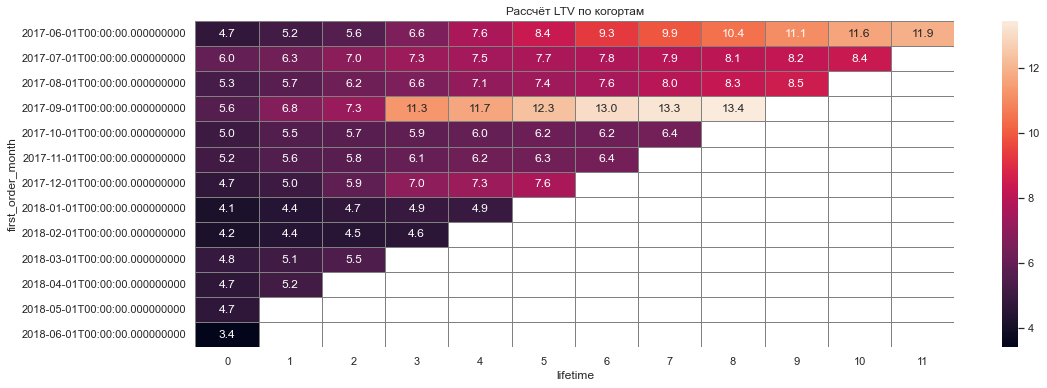

In [62]:
plt.figure(figsize=(17,6)) #выведем тепловую карту
plt.title('Рассчёт LTV по когортам')
sns.heatmap(ltv, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

In [63]:
round(ltv[5].mean(), 2) #посчитаем среднее LTV за полгода в когортах, существующих от полугода

7.97

Глядя на тепловую карту, можно увидеть, что выделяются 2 когорты: июнь и сентябрь. В среднем, каждый покупатель принёс почти 8 у.е.

[В начало](#step5)

#### C.Маркетинговые метрики. <a name="stepC"></a>

In [64]:
first_source_id = visits[visits['first_session'] == visits['start_ts']] #соберём таблицу первых визитов пользователея

In [65]:
first_source = first_source_id[['uid', 'source_id']] #оставим в ней информацию только об id пользователя и канала привлечения

In [66]:
first_source.columns = ['uid', 'first_source_id'] #переименуем столбец в первый канал привлечения

In [67]:
visits = visits.merge(first_source, on='uid', how='left') #добавим в общую таблицу информацию о первом источнике

In [68]:
costs_per_sources = costs.groupby('source_id').agg({'costs':'sum'}).reset_index() #считаем сумму затрат по источникам
costs_per_sources

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [69]:
costs['costs'].sum() #сумма общих затрат

329131.62

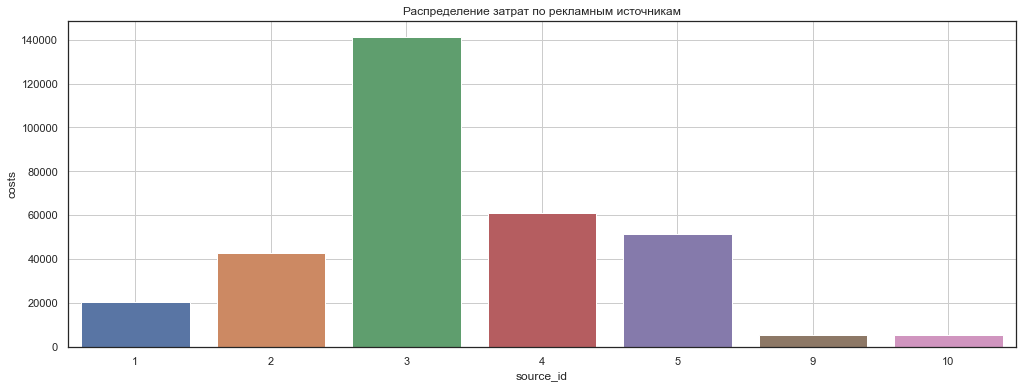

In [70]:
plt.figure(figsize=(17,6))
plt.title('Распределение затрат по рекламным источникам')
#plt.bar(costs_per_sources['source_id'], costs_per_sources['costs'])
sns.barplot(costs_per_sources['source_id'], costs_per_sources['costs'])
plt.grid()
plt.show()

Общая сумма затрат на маркетинг по всем 7 рекламным источникам составляет 329131 у.е. Из них, больше всего (более 40%) затраты на 3 источник, а меньше всего (менее чем по 2%) затраты на 9 и 10 источники.

In [71]:
orders_visits_merge = orders.merge(visits, on='uid', how='left') #добавим в датафрейм с заказами информацию о визитах и источниках

In [72]:
orders_visits = orders_visits_merge[['revenue', 'uid', 'buy_ts', 'first_session_month', 'first_source_id']] #оставим только нужные столбцы

In [73]:
orders_visits = orders_visits.drop_duplicates() #удалим дубликаты

In [74]:
values_cohorts = orders_visits.groupby(['first_session_month', 'first_source_id'])\
    .agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
#сгруппируем заказы по первому визиту и рекламному источнику, чтобы узнать, откуда пришёл покупатель

In [75]:
costs['month'] = costs['dt'].astype('datetime64[M]') #добавим в датафрейм с затратами столбец с месяцем затраты

In [76]:
costs_per_month = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index() #сгруппируем по месяцу и источнику

In [77]:
costs_per_month.columns = ['first_session_month', 'first_source_id', 'costs'] #переименуем для склейки

In [78]:
cohorts_sources = values_cohorts.merge(costs_per_month, on=['first_session_month', 'first_source_id']) 
#приклеим информацию о тратах к заказам

In [79]:
def count_ltv_cac(df): #функция для подсчёта LTV и CAC
    df['ltv'] = df['revenue'] / df['uid']
    df['ltv'] = df['ltv'].round(2)
    df['cac'] = df['costs'] / df['uid']
    df['cac'] = df['cac'].round(2)
    df['romi'] = df['ltv'] / df['cac']
    df['romi'] = df['romi'].round(2)

In [80]:
count_ltv_cac(cohorts_sources) #посчитаем LTV, CAC и ROMI

In [81]:
cac_sources_by_month = cohorts_sources.pivot_table(index='first_source_id',\
                                                   columns='first_session_month', values='cac', aggfunc='max')

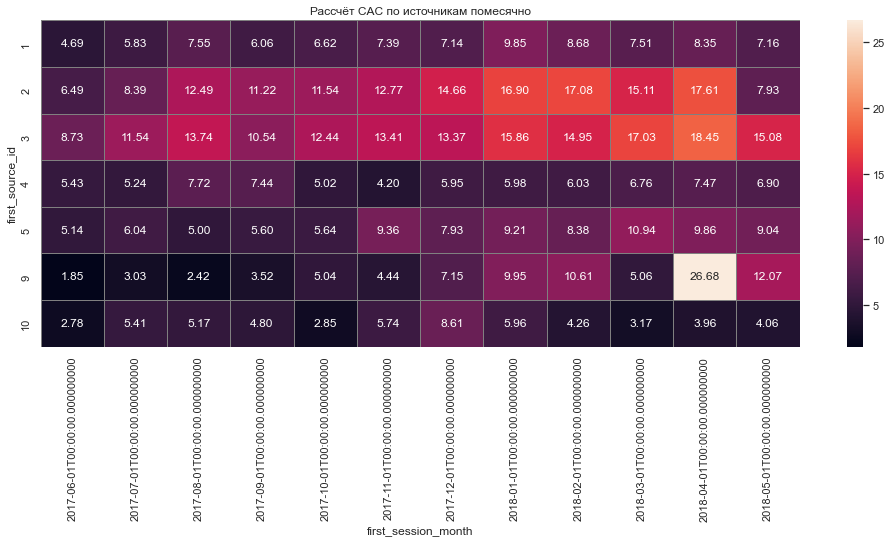

In [82]:
plt.figure(figsize=(17,6)) #выведем тепловую карту
plt.title('Рассчёт CAC по источникам помесячно')
sns.heatmap(cac_sources_by_month, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

2 и 3 источники долгий период показывают большой CAC, привлечение покупателей через этот канал дороже всего. 9 источник в апреле имел аномально высокий показатель, по сравнению с июнем, с декабря CAC очень сильно растёт.

In [83]:
sources_grouped = cohorts_sources.groupby('first_source_id').agg({'uid':'sum', 'revenue':'sum', 'costs':'sum'}).reset_index()
#сгруппируем по рекламным источниками

In [84]:
count_ltv_cac(sources_grouped) #посчитаем LTV, CAC и ROMI в рекламных источниках

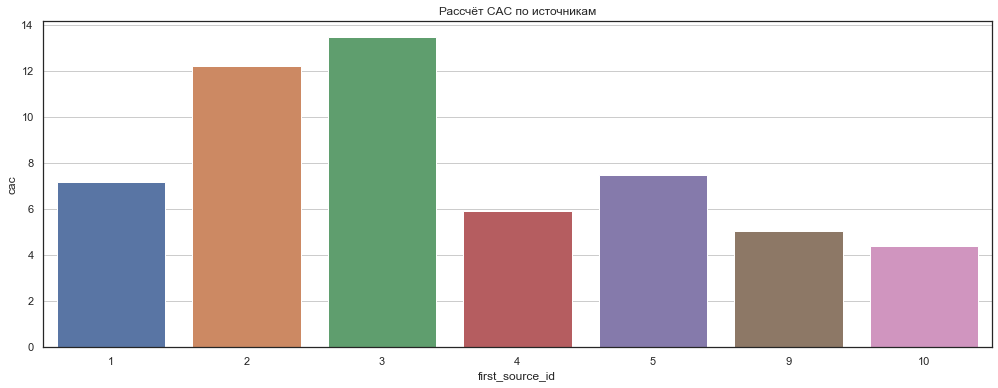

In [85]:
plt.figure(figsize=(17,6))
plt.title('Рассчёт CAC по источникам')
plt.grid()
sns.barplot(sources_grouped['first_source_id'], sources_grouped['cac'])
plt.show()

Как мы и видели на тепловой карте, 2 и 3 источники привлекают самых дорогих покупателей.

In [86]:
month_grouped = cohorts_sources.groupby('first_session_month').agg({'uid':'sum', 'revenue':'sum', 'costs':'sum'}).reset_index()
#сгруппируем по месяцам
count_ltv_cac(month_grouped) #посчитаем LTV, CAC и ROMI помесячно

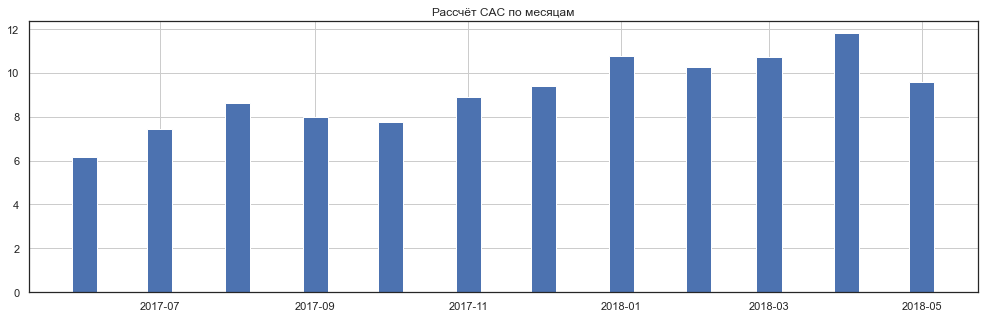

In [87]:
plt.figure(figsize=(17,5))
plt.title('Рассчёт CAC по месяцам')
plt.grid()
plt.bar(month_grouped['first_session_month'], month_grouped['cac'], width=10)
plt.show()

С течением времени, наблюдается рост стоимости привлечения покупателя. Возможно, поведение клиентов меняется, а маркетинг не реагирует на изменения, либо, наоборот, маркетинг меняется, но не так, как это нужно рынку.

In [88]:
mean_ltv = sources_grouped['revenue'].sum() / sources_grouped['uid'].sum() #посчитаем средний LTV
mean_cac = sources_grouped['costs'].sum() / sources_grouped['uid'].sum() #посчитаем средний CAC

In [ ]:
romi_sources_by_month = cohorts_sources.pivot_table(index='first_source_id',\
                                                   columns='first_session_month', values='romi', aggfunc='max')

In [ ]:
plt.figure(figsize=(17,5)) #выведем тепловую карту ROMI
plt.title('Рассчёт ROMI по источникам помесячно')
sns.heatmap(romi_sources_by_month, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=2)
plt.show()

В июне по всем рекламным источникам был ROMI больше 1, кроме 3 источника. В 2018 году, вообще, больше 1 он был только в марте у 10 источника. Наибольший показатель у источников по сентябрь. Казалось бы, если рекламный источник приносит прибыль, то на окупаемость он выходит примерно на 8 месяц. Однако, учитывая то, что чаще всего, клиент покупает в тот же день, что впервые заходит на сайт и низкий Retention Rate, значит, что, вряд ли, большинство источников окупится с течением времени.

In [ ]:
plt.figure(figsize=(17,6))
plt.title('Рассчёт ROMI по источникам')
plt.grid()
sns.barplot(sources_grouped['first_source_id'], sources_grouped['romi'])
plt.show()

Наибольший  ROMI у 1 источника. Большую роль в этом сыграл июнь, когда показатель был нетипично высоким. У 3, 4 и 10 источников показатель меньше 1. То есть, за год эти 3 источника не окупили себя.

In [ ]:
plt.figure(figsize=(17,5))
plt.title('Рассчёт ROMI по месяцам')
plt.grid()
plt.bar(month_grouped['first_session_month'], month_grouped['romi'], width=10)
plt.show()

На этом графике мы видим общее падение окупаемости рекламных источников.

[В начало](#step5)

### Выводы. <a name="step4"></a>

In [ ]:
plt.figure(figsize=(17,7))
plt.title('Сравнение источников')
plt.grid()
plt.bar(sources_grouped['first_source_id']+0.2, sources_grouped['romi'], width=0.4, label='romi')
plt.bar(sources_grouped['first_source_id']-0.2, sources_grouped['cac'], width=0.4, label='cac')
plt.legend(loc='upper left')
plt.show()

1. Учитывая, что 3, 4 и 10 источники так и не вышли на окупаемость за год, а у 3 и 4 практически ни одна когорта не окупилась, можно сделать вывод, что от этих источников либо надо отказываться, либо кардинально пересматривать саму концепцию рекламы через эти источники, менять подход. Источник номер 2 получился очень дорогой. Однако, тенденцию по окупаемости по когортам он показывает самую интересную из всех. У первого источника самый высокий показатель окупаемости, однако здесь, скорее всего сыграла большую роль первая июньская когорта, когда был аномально высокий показатель окупаемости. Я бы рекомендовал обратить внимание маркетологам на 2 рекламный источник. Он показывает себя стабильнее всего по окупаемости. Но по этому источнику необходимо снизить стоимость 1го покупателя.

2. 
    - Маркетинговые метрики: Больше всего было потрачено на 3 рекламный источник, а он имеет наименьшую окупаемость. Соответсвенно, этот источник принёс компании немалый убыток. В целом, половина рекламных источников окупает себя. Но другая половина не окупает. В июне покупатель обходился дешевле всего, а в апреле дороже. Однако, в конце марта - начале апреля были, видимо, какие-то технические проблемы на ресурсе и пользователи не могли зайти на сайт. 
    - Продуктовые метрики: В спросе наблюдается сезонность: летом посещения меньше. Связано это, скорее всего, с периодом отпусков как у артистов, так и у клиентов. Retention Rate очень низкий. Пользователи практически не возвращаются на ресурс. Необходимо значительно повысить повторный визит пользователей, напоминать им о ресурсе.
    - Метрики электронной коммерции: Чаще всего, пользователь покупает в тот же день, что и заходит на сайт. Учитывая, что на покупателя, в среднем, приходится по 1,4 покупки, значит, что пользователь заходит, покупает и забывает о существовании ресурса. Из 10 человек только 4 совершает повторную покупку. Средний чек составляет 5 у.е, а в среднем на покупателя приходится по 8 у.е дохода. Если увеличить количество повторных визитов и покупок, соответственно, повысится и доход с одного покупателя, и увеличит прибыль.

3. Несмотря на то, что летом посещаемость ресурса снижается, пользователи привлечённые летом принесли больше всего прибыли компании. К наиболее прибыльным ещё отнесём пользователей, привлечённых в сентябре. Когорты июня и сентября выделяются ещё и тем, что со временем больше, чем остальные наращивают прибыль, то есть, в отличии от других когорт возвращаются за повторными покупками. Их можно отнести к наиболее перспективным.